# Laboratorio 1 Series de Tiempo

Sofia Garcia - 22210

Julio Garcia Salas - 22076

Joaquin Campos - 22155

In [2]:
import pandas as pd

file_path = "Estadisticas_historicas_comercializacion.xlsx"

importacion_df = pd.read_excel(file_path, sheet_name="IMPORTACION", header=6, nrows=289)
consumo_df = pd.read_excel(file_path, sheet_name="CONSUMO", header=6, nrows=301)

#consumo_df.head()
importacion_df.head()


C:\Users\jjcam\AppData\Local\Temp\ipykernel_31164\2873291014.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Fecha,Aceites lubricantes,Asfalto,Bunker,Ceras,Combustible turbo jet,Diesel bajo azufre,Diesel ultra bajo azufre,Gas licuado de petróleo,Gasolina de aviación,...,Naftas,Petcoke,Petróleo crudo,Solventes,Butano,Diesel alto azufre,MTBE,Orimulsión,Petróleo reconstituido,Total importación
0,2001-01-01,0.0,27748.99,214581.84,0.0,0.0,0.0,0.0,194065.738095,820.0,...,0.0,0.0,0.0,0.0,0.0,566101.99,8402,0.0,715344,2.312639e+06
1,2001-02-01,0.0,7503.57,294609.00,0.0,0.0,0.0,0.0,170703.380952,3054.0,...,0.0,0.0,0.0,0.0,0.0,489525.80,0,0.0,370166,1.769209e+06
2,2001-03-01,0.0,26304.32,315263.80,0.0,0.0,0.0,0.0,161837.371429,677.0,...,0.0,0.0,0.0,0.0,0.0,575559.68,0,0.0,360530,1.945770e+06
3,2001-04-01,0.0,7885.89,205653.00,0.0,0.0,0.0,0.0,163048.642857,3399.0,...,0.0,0.0,0.0,0.0,0.0,437745.42,8184,0.0,359527,1.623638e+06
4,2001-05-01,0.0,8443.16,278371.30,0.0,0.0,0.0,0.0,171518.861905,585.0,...,0.0,0.0,0.0,0.0,0.0,552609.13,12680,0.0,723346,2.262727e+06


DF que deseamos trabajar

In [3]:
cols = ["Fecha", "Gasolina regular", "Gasolina superior", "Diesel alto azufre"]

importacion_df = importacion_df[cols].copy()
importacion_df["Fecha"] = pd.to_datetime(importacion_df["Fecha"])
importacion_df = importacion_df.sort_values("Fecha").reset_index(drop=True)

consumo_df = consumo_df[cols].copy()
consumo_df["Fecha"] = pd.to_datetime(consumo_df["Fecha"])
consumo_df = consumo_df.sort_values("Fecha").reset_index(drop=True)

importacion_df.to_csv("importaciones_combustibles.csv", index=False)
consumo_df.to_csv("consumos_combustibles.csv", index=False)




In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Estilo bonito para los gráficos
sns.set(style="whitegrid")

#tipos
print("importacion:\n",importacion_df.dtypes)
print("consumo:\n",consumo_df.dtypes)


importacion:
 Fecha                 datetime64[ns]
Gasolina regular             float64
Gasolina superior            float64
Diesel alto azufre           float64
dtype: object
consumo:
 Fecha                 datetime64[ns]
Gasolina regular             float64
Gasolina superior            float64
Diesel alto azufre           float64
dtype: object


## Análisis exploratorio

Como visto en clase tenemos que buscar las 3 cosas para definir el modelo a tratar: tendencias, estacionalidad y ruido

Primero definimos como la fecha visualmente la serie de tiempo digamos es de un mes

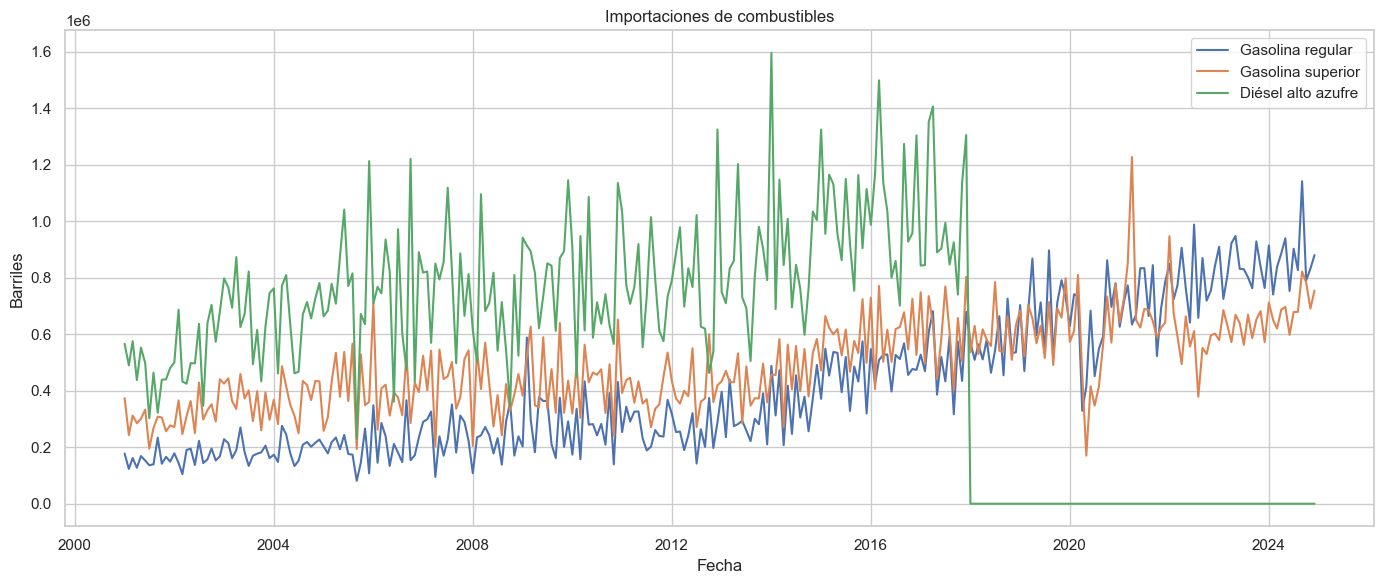

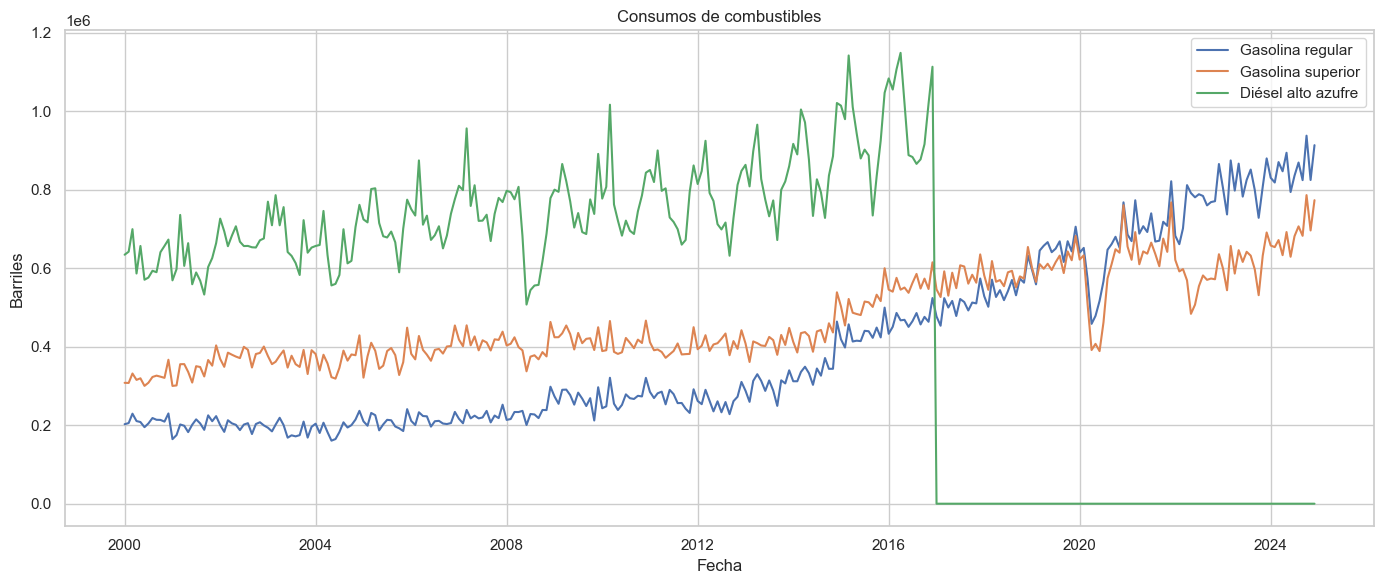

In [5]:
plt.figure(figsize=(14, 6))
plt.plot(importacion_df["Fecha"], importacion_df["Gasolina regular"], label="Gasolina regular")
plt.plot(importacion_df["Fecha"], importacion_df["Gasolina superior"], label="Gasolina superior")
plt.plot(importacion_df["Fecha"], importacion_df["Diesel alto azufre"], label="Diésel alto azufre")
plt.title("Importaciones de combustibles")
plt.xlabel("Fecha")
plt.ylabel("Barriles")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))
plt.plot(consumo_df["Fecha"], consumo_df["Gasolina regular"], label="Gasolina regular")
plt.plot(consumo_df["Fecha"], consumo_df["Gasolina superior"], label="Gasolina superior")
plt.plot(consumo_df["Fecha"], consumo_df["Diesel alto azufre"], label="Diésel alto azufre")
plt.title("Consumos de combustibles")
plt.xlabel("Fecha")
plt.ylabel("Barriles")
plt.legend()
plt.tight_layout()
plt.show()



### Comentarios

Sin duda alguna  lo que mas llama la atencion es como al rededor del 2018... el diesel de alto azufre se fue a 0 directamente, y despues de un poco de investigación podemos concluir que este si tiene sentido y que fue por la Regulación nacional: entrada en vigor del reglamento COGUANOR, Impacto en salud pública y ambiente y basicamente que ahora casi solo se usa bajo en azufre 

### Importaciones

1. Tendencia general

Las tres series muestran una tendencia creciente a lo largo del tiempo, particularmente Gasolina regular y superior. El crecimiento es más claro después de 2015 para gasolina regular.

2. Caídas abruptas y anomalías

Se observa una caída abrupta en 2020, justo cuando inicia la pandemia. Este efecto es visible especialmente en mabas gasolinas.

3. Estacionalidad y picos

Hay picos irregulares año con año, más notorios en diésel alto azufre hasta su desaparición que pareciera como que si tiene patron entonces desde ahi podemos tal vez empezar a ubicar nuestras series. Gasolina superior también muestra picos de importación en varios años, algunos muy marcados entre 2006 y 2018. La estacionalidad no parece haber a simple vista entonces al evaluar otra serie de tiempo podriamos evaluar.


### Consumo

1. Tendencia general

Gasolina regular y superior muestran una clara tendencia creciente, especialmente gasolina regular.

Diésel alto azufre mantuvo tendencia minima tambien creciente hasta que baja a 0.

2. Picos y caídas por pandemia

Se observa una disminución marcada en todos los combustibles entre marzo y junio de 2020 por pandemia.

Gasolina regular cae notoriamente, pero se recupera rápidamente y continúa su crecimiento.

Gasolina superior cae y se estabiliza.


3. Estacionalidad

Diésel alto azufre muestra ligeros picos cíclicos, entonces podria ser por uso industrial o agrícola estacional.

Gasolina superior muestra picos más dispersos, con cierta repetición anual.


## Serie 1 -  importación de gasolina regular



In [6]:
import_gasolina_regular = importacion_df.set_index("Fecha")["Gasolina regular"]

print("Serie: Importación de gasolina regular")
print(f"- Inicio     : {import_gasolina_regular.index.min().date()}")
print(f"- Fin        : {import_gasolina_regular.index.max().date()}")
print(f"- Total de observaciones: {len(import_gasolina_regular)}")


Serie: Importación de gasolina regular
- Inicio     : 2001-01-01
- Fin        : 2024-12-01
- Total de observaciones: 288


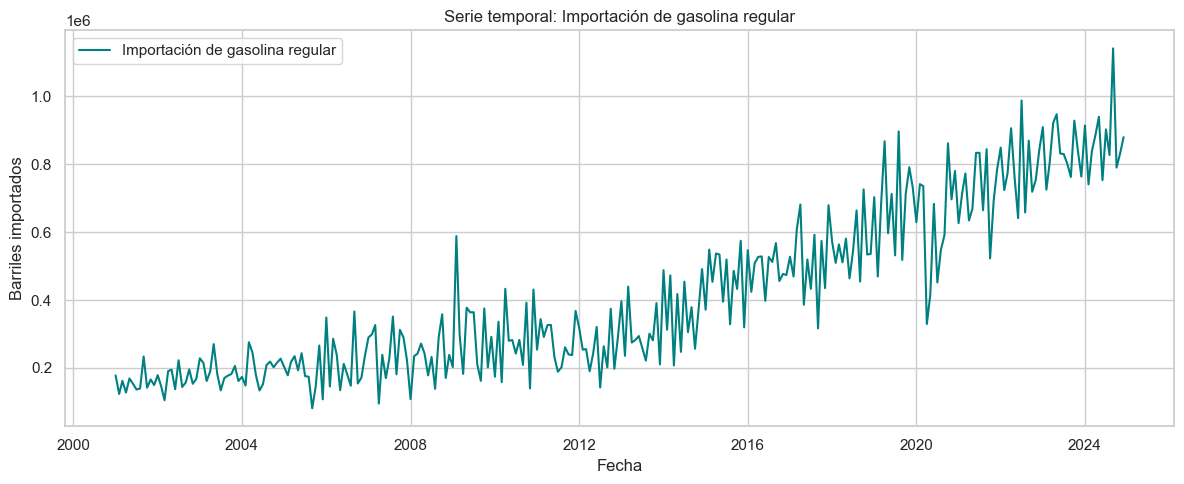

In [7]:

plt.figure(figsize=(12, 5))
plt.plot(import_gasolina_regular, label="Importación de gasolina regular", color="teal")
plt.title("Serie temporal: Importación de gasolina regular")
plt.xlabel("Fecha")
plt.ylabel("Barriles importados")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Explicación 

Tendencia creciente.

Una caída clara en 2020, por la pandemia.

Recuperación y crecimiento en los últimos años.

No hay mayor estacionalidad a lo largo de todos los años tal vez al descomponer

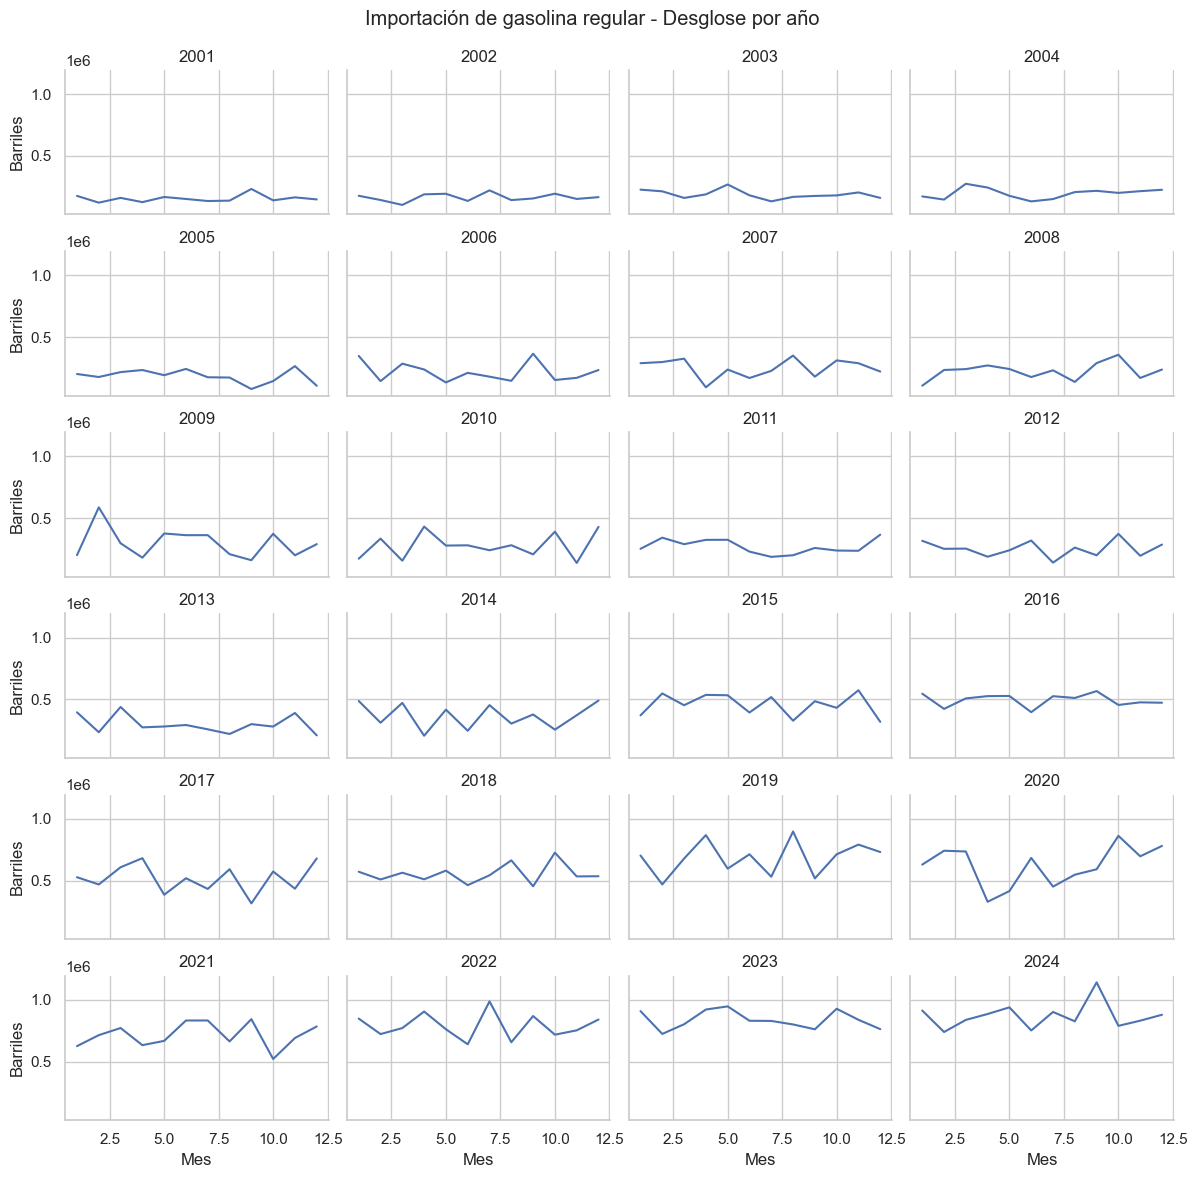

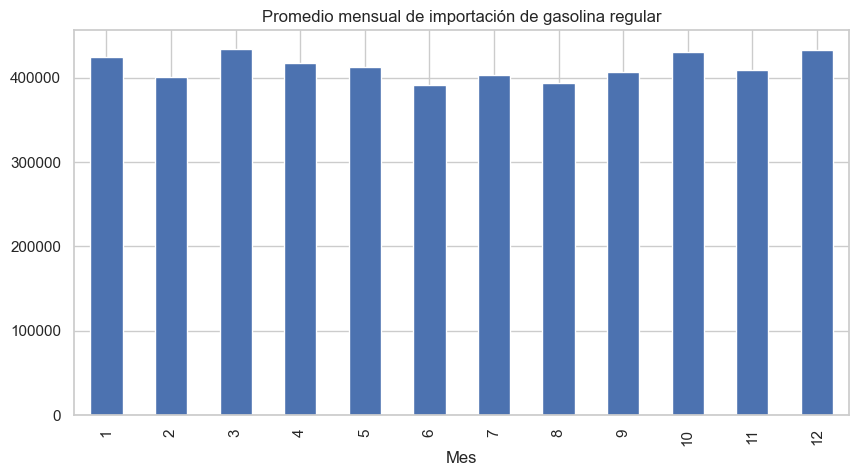

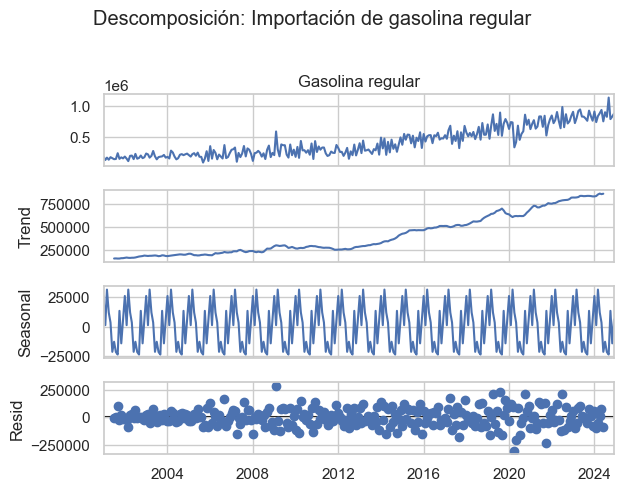

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Crear columna de año y mes
df_yearplot = import_gasolina_regular.reset_index()
df_yearplot["Año"] = df_yearplot["Fecha"].dt.year
df_yearplot["Mes"] = df_yearplot["Fecha"].dt.month

# Crear gráfico
g = sns.FacetGrid(df_yearplot, col="Año", col_wrap=4, height=2, aspect=1.5)
g.map_dataframe(sns.lineplot, x="Mes", y="Gasolina regular")
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Mes", "Barriles")
g.fig.subplots_adjust(top=0.93)
g.fig.suptitle("Importación de gasolina regular - Desglose por año")
plt.show()


###
importacion_df["Mes"] = importacion_df["Fecha"].dt.month
importacion_df.groupby("Mes")["Gasolina regular"].mean().plot(kind="bar", figsize=(10,5), title="Promedio mensual de importación de gasolina regular")

# Descomposicion por año 12 meses
decomposed = seasonal_decompose(import_gasolina_regular, model='additive', period=12)
decomposed.plot()
plt.suptitle("Descomposición: Importación de gasolina regular", y=1.02)
plt.tight_layout()
plt.show()


1. Serie original (Gasolina regular)

Presenta una tendencia creciente

2. Tendencia

La curva es suavemente creciente

Refleja claramente la no estacionariedad en media, ya que el valor promedio de la serie cambia con el tiempo.

3. Estacionalidad

es cíclica y estable cada 12 meses.

Esto confirma una estacionalidad anual.

La amplitud del componente estacional se mantiene constante lo quw nos empieza a decir el modelo.

4. Ruido

La dispersión del residuo aumenta levemente hacia los últimos años.


Sobre todo la varianza no es estable para mayor cosa por lo qe podemos ayudarnos para el punto d. entonces podriamos transformar.

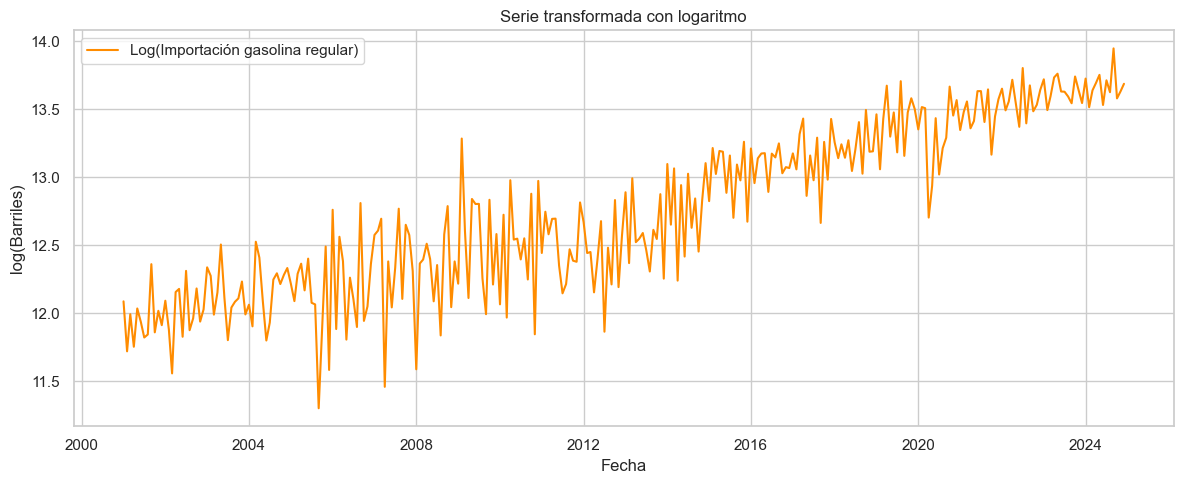

In [9]:
log_serie = np.log(import_gasolina_regular)

plt.figure(figsize=(12, 5))
plt.plot(log_serie, label="Log(Importación gasolina regular)", color="darkorange")
plt.title("Serie transformada con logaritmo")
plt.xlabel("Fecha")
plt.ylabel("log(Barriles)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Sí fue necesario aplicar una transformación logarítmica para estabilizar la varianza antes de modelar.
La serie no es estacionaria en varianza, y el logaritmo ayuda a corregir eso.

Inciso e. si no es estacionaria en media


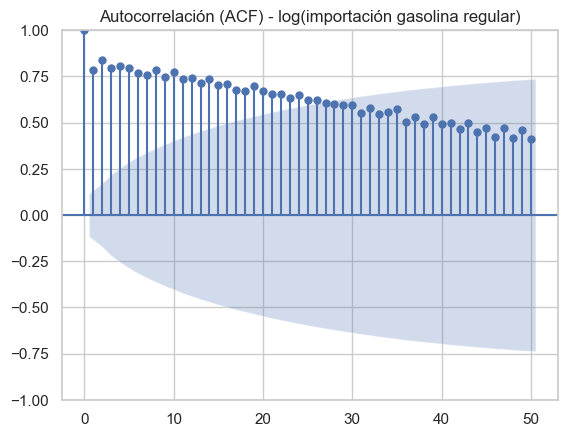

In [10]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(log_serie, lags=50)
plt.title("Autocorrelación (ACF) - log(importación gasolina regular)")
plt.show()


El gráfico de autocorrelación muestra que la serie tiene una estructura de dependencia fuerte a largo plazo, con autocorrelaciones que decaen lentamente.
Esto es evidencia clara de que la serie no es estacionaria en media.

Dickey fuller

In [11]:
from statsmodels.tsa.stattools import adfuller

# Prueba ADF
adf_result = adfuller(log_serie)

print("Prueba de Dickey-Fuller Aumentada (ADF)")
print(f"Estadístico ADF: {adf_result[0]}")
print(f"p-valor        : {adf_result[1]}")
print("Valores críticos:")
for key, value in adf_result[4].items():
    print(f"  - {key}: {value}")


Prueba de Dickey-Fuller Aumentada (ADF)
Estadístico ADF: -0.1179250971227434
p-valor        : 0.9476235967263928
Valores críticos:
  - 1%: -3.4544435065994437
  - 5%: -2.8721468827772774
  - 10%: -2.572422013959188


Según la prueba ADF, la serie transformada con logaritmo no es estacionaria en media.
Esto corrobora el incioso i.

Para hacerla estacionaria en media, es necesario aplicar una diferenciación:
diff_log = log_serie.diff().dropna()

Esto elimina la tendencia lineal de la serie y acentra la media, lista para modelado con ARIMA.

Después de analizar la serie, se determinó que no es estacionaria ni en media ni en varianza, y presenta una estacionalidad anual clara.
Por lo tanto, el modelo adecuado no es ARMA ni ARIMA, sino SARIMA.
Se elegirá el orden d = 1 debido a la no estacionariedad en media, y se evaluarán los parámetros p y q con los gráficos ACF y PACF.
Adicionalmente, se probará el algoritmo auto_arima para sugerir un modelo y se comparará su desempeño con los modelos ajustados manualmente.

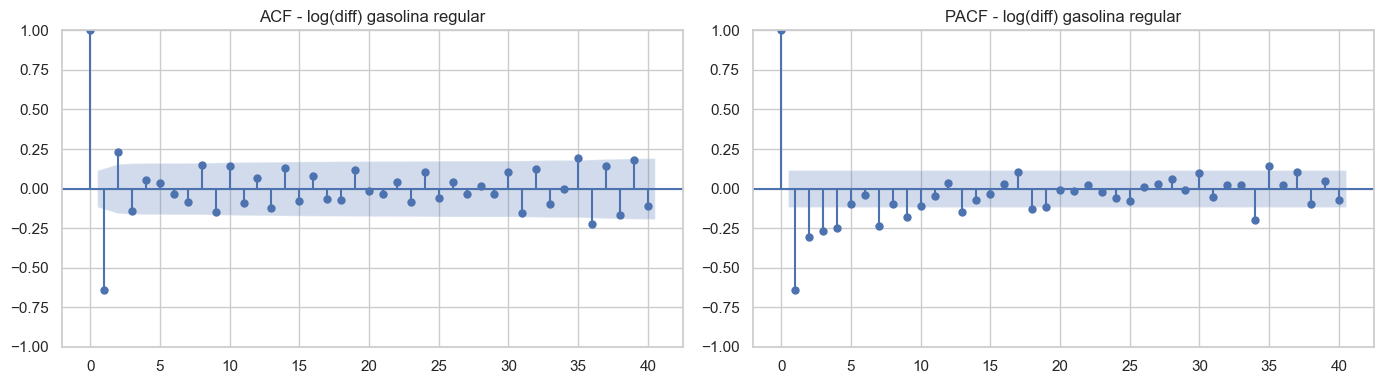

In [12]:

diff_log = log_serie.diff().dropna()

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# ACF
plot_acf(diff_log, ax=axes[0], lags=40)
axes[0].set_title("ACF - log(diff) gasolina regular")

# PACF
plot_pacf(diff_log, ax=axes[1], lags=40, method="ywm")
axes[1].set_title("PACF - log(diff) gasolina regular")

plt.tight_layout()
plt.show()



El primer lag tiene una autocorrelación muy fuert.

A partir del lag 2, todas las autocorrelaciones caen dentro del intervalo de confianza.

El comportamiento es clásico de una serie MA(1):

Se espera una caída brusca.

La ACF sugiere que un componente q = 1 es adecuado (modelo MA(1)).


Con base en la ACF y PACF de la serie transformada (log) y diferenciada, se propone un modelo ARIMA(1, 1, 1).

p = 1 por el corte en la PACF

d = 1 por la no estacionariedad en media

q = 1 por el corte en la ACF

In [13]:
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

# Lista de modelos a evaluar
modelos = [(1,1,1), (2,1,1), (1,1,2), (2,1,2), (0,1,1), (1,1,0), (0,1,2)]

resultados = []

for orden in modelos:
    modelo = ARIMA(log_serie, order=orden)
    resultado = modelo.fit()
    resultados.append((orden, resultado.aic, resultado.bic))
    print(f"ARIMA{orden} → AIC: {resultado.aic:.2f}, BIC: {resultado.bic:.2f}")


ARIMA(1, 1, 1) → AIC: 49.28, BIC: 60.26
ARIMA(2, 1, 1) → AIC: 50.37, BIC: 65.01
ARIMA(1, 1, 2) → AIC: 49.87, BIC: 64.51
ARIMA(2, 1, 2) → AIC: 51.84, BIC: 70.14
ARIMA(0, 1, 1) → AIC: 63.10, BIC: 70.42
ARIMA(1, 1, 0) → AIC: 128.25, BIC: 135.57
ARIMA(0, 1, 2) → AIC: 51.35, BIC: 62.32


Se probaron múltiples modelos ARIMA con distintos órdenes de p y q.
El modelo con menor AIC fue ARIMA(1,1,1), lo que indica que es el mejor balance entre ajuste y complejidad.
Este modelo será usado como base para comparar luego con Facebook Prophet en el inciso h.

In [14]:
from prophet import Prophet

df_prophet = pd.DataFrame()
df_prophet["ds"] = import_gasolina_regular.index
df_prophet["y"] = np.log(import_gasolina_regular.values) 

df_prophet.head()




Importing plotly failed. Interactive plots will not work.


,ds,y
0,2001-01-01,12.088282
1,2001-02-01,11.720882
2,2001-03-01,11.993661
3,2001-04-01,11.754606
4,2001-05-01,12.036056


15:30:19 - cmdstanpy - INFO - Chain [1] start processing
15:30:19 - cmdstanpy - INFO - Chain [1] done processing


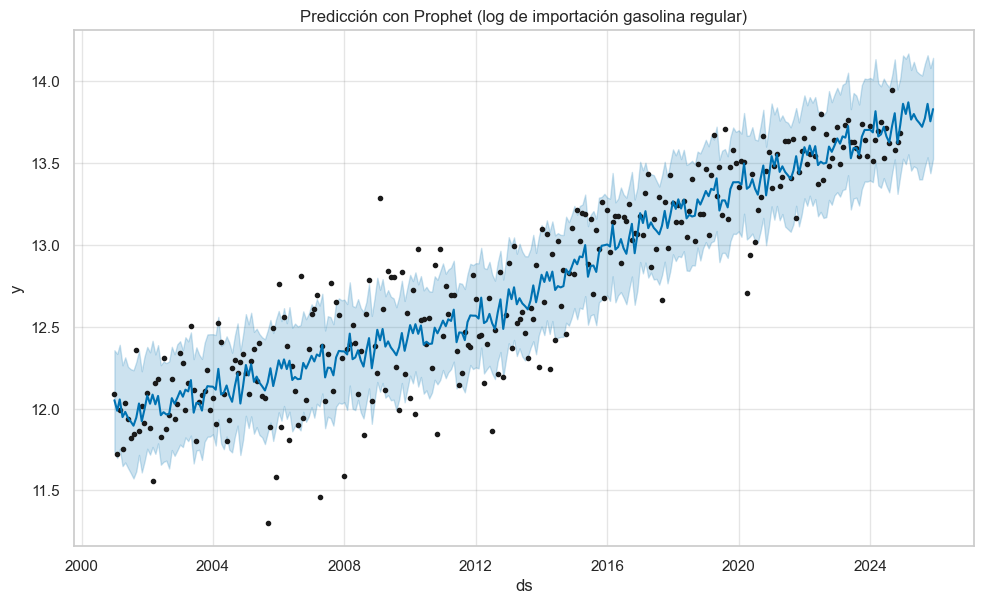

In [15]:
modelo_prophet = Prophet(yearly_seasonality=True)
modelo_prophet.fit(df_prophet)

future = modelo_prophet.make_future_dataframe(periods=12, freq='MS')
forecast = modelo_prophet.predict(future)

modelo_prophet.plot(forecast)
plt.title("Predicción con Prophet (log de importación gasolina regular)")
plt.show()



In [16]:
from sklearn.metrics import mean_squared_error

from statsmodels.tsa.arima.model import ARIMA
modelo_arima = ARIMA(np.log(import_gasolina_regular), order=(1,1,1)).fit()
pred_arima = modelo_arima.predict(start=1, end=len(import_gasolina_regular)-1)

pred_prophet = forecast.set_index("ds").loc[import_gasolina_regular.index]["yhat"]

y_real = np.log(import_gasolina_regular)
arima_rmse = np.sqrt(mean_squared_error(y_real[1:], pred_arima))
prophet_rmse = np.sqrt(mean_squared_error(y_real, pred_prophet))

print(f"RMSE ARIMA: {arima_rmse:.4f}")
print(f"RMSE Prophet: {prophet_rmse:.4f}")


RMSE ARIMA: 0.2608
RMSE Prophet: 0.2445


El modelo Prophet obtuvo un menor error cuadrático medio (RMSE) en los datos transformados con logaritmo, lo que indica que funcionó mejor en capturar la dinámica de la serie que el modelo ARIMA (1,1,1) seleccionado.

PREGUNTA A INTELIGENCIA ARTIFICIAL:

"*Prophet modela la tendencia no lineal de forma más flexible.*

*También ajusta automáticamente la estacionalidad anual, sin necesidad de que nosotros la especifiquemos como en SARIMA.*

*Puede adaptarse mejor a cambios estructurales o perturbaciones (como las de 2020).*"

## Serie 2 -  importación de gasolina Superior



In [17]:
import_gasolina_superior = importacion_df.set_index("Fecha")["Gasolina superior"]

print("Serie: Importación de gasolina superior")
print(f"- Inicio     : {import_gasolina_superior.index.min().date()}")
print(f"- Fin        : {import_gasolina_superior.index.max().date()}")
print(f"- Total de observaciones: {len(import_gasolina_superior)}")


Serie: Importación de gasolina superior
- Inicio     : 2001-01-01
- Fin        : 2024-12-01
- Total de observaciones: 288


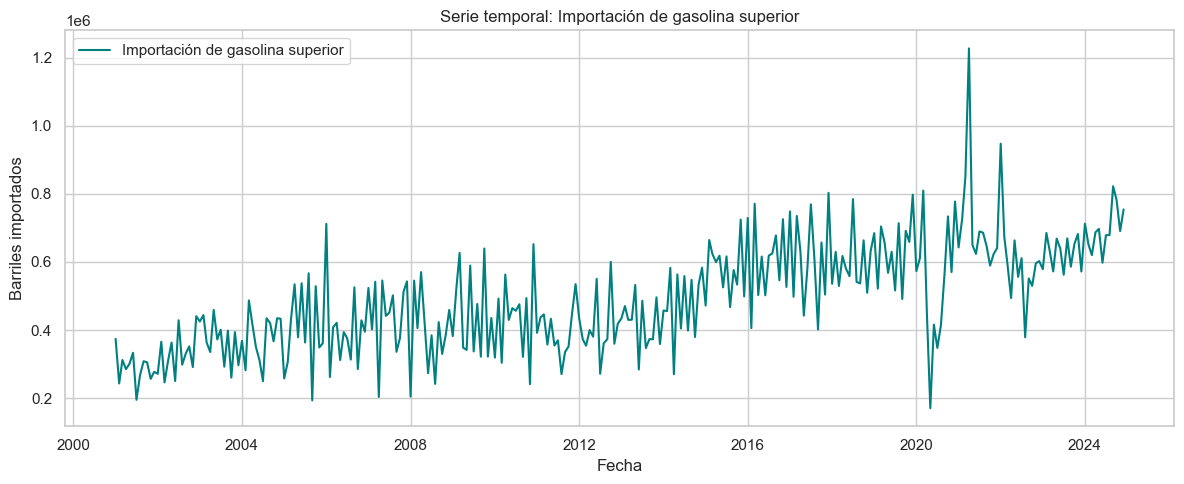

In [18]:

plt.figure(figsize=(12, 5))
plt.plot(import_gasolina_superior, label="Importación de gasolina superior", color="teal")
plt.title("Serie temporal: Importación de gasolina superior")
plt.xlabel("Fecha")
plt.ylabel("Barriles importados")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Explicación 

La serie muestra una tendencia creciente

Se observa una alta variabilidad en los datos, con algunos picos muy marcados.

Una caída pronunciada alrededor de 2020, por la pandemia.

En los años posteriores, se nota una recuperación progresiva.

A simple vista, no se nota una estacionalidad.

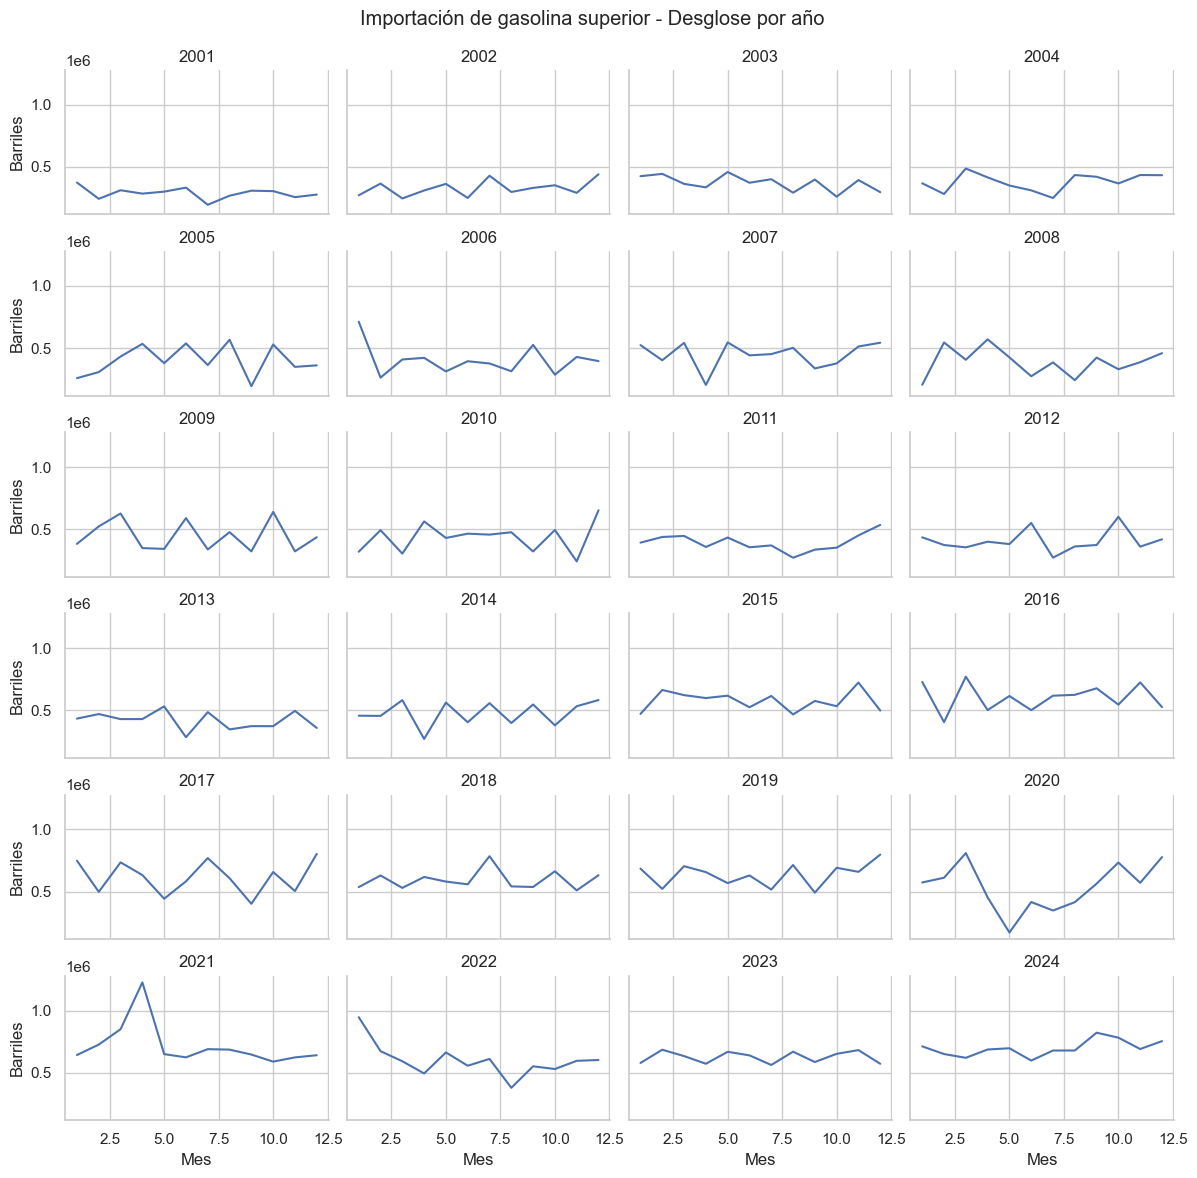

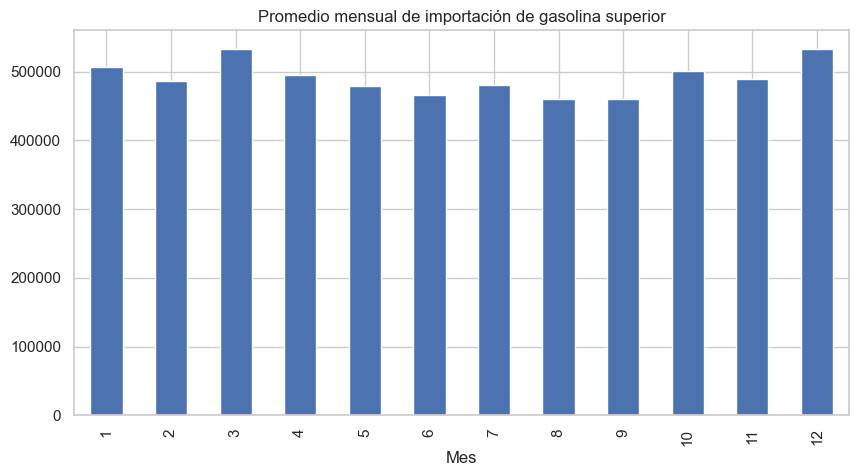

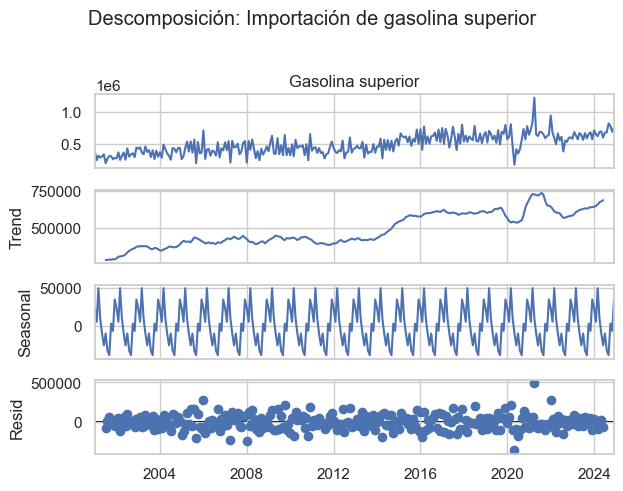

In [19]:

# Crear columna de año y mes
df_yearplot = import_gasolina_superior.reset_index()
df_yearplot["Año"] = df_yearplot["Fecha"].dt.year
df_yearplot["Mes"] = df_yearplot["Fecha"].dt.month

# Crear gráfico
g = sns.FacetGrid(df_yearplot, col="Año", col_wrap=4, height=2, aspect=1.5)
g.map_dataframe(sns.lineplot, x="Mes", y="Gasolina superior")
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Mes", "Barriles")
g.fig.subplots_adjust(top=0.93)
g.fig.suptitle("Importación de gasolina superior - Desglose por año")
plt.show()


###
importacion_df["Mes"] = importacion_df["Fecha"].dt.month
importacion_df.groupby("Mes")["Gasolina superior"].mean().plot(kind="bar", figsize=(10,5), title="Promedio mensual de importación de gasolina superior")

# Descomposicion por año 12 meses
decomposed = seasonal_decompose(import_gasolina_superior, model='additive', period=12)
decomposed.plot()
plt.suptitle("Descomposición: Importación de gasolina superior", y=1.02)
plt.tight_layout()
plt.show()


A primera vista podemos ver como la gasoliina superior tiende a tener picos mas pronunciados que regular.

Tendencia:

Se observa una tendencia creciente.

Entre 2015 y 2018, la tendencia se estabiliza en valores altos y luego la caida del covid

A partir de 2021, hay una recuperación gradual.

Estacionalidad:

La serie presenta una estacionalidad mensual muy marcada.


Ruido:

están en su mayoría centrados alrededor de cero

se observan algunos valores atípicos, especialmente después de 2019, 


Nuevamente sí, es necesario transformar la serie, para estabilizar la varianza.

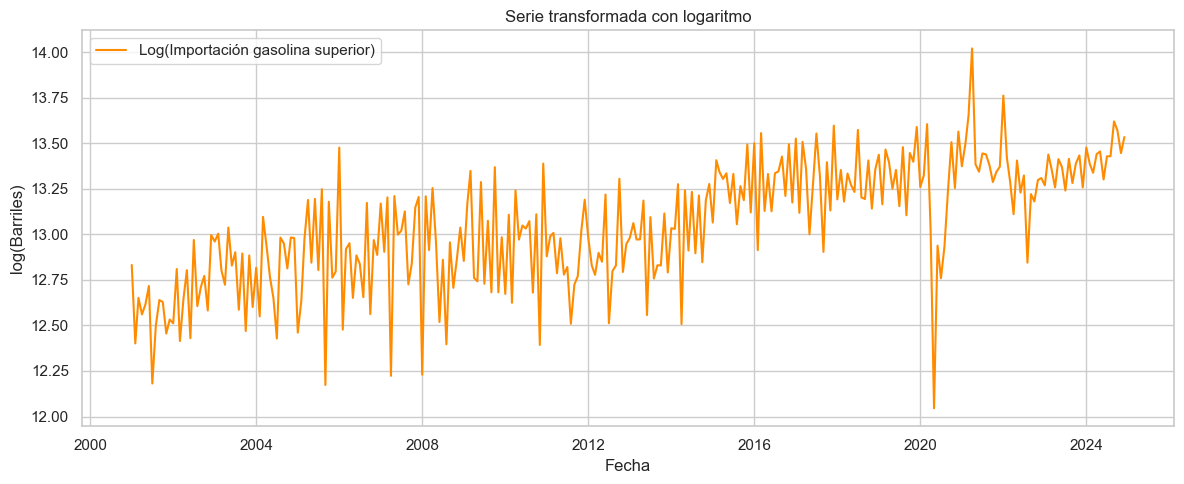

In [22]:
log_serie_sup = np.log(import_gasolina_superior)

plt.figure(figsize=(12, 5))
plt.plot(log_serie_sup, label="Log(Importación gasolina superior)", color="darkorange")
plt.title("Serie transformada con logaritmo")
plt.xlabel("Fecha")
plt.ylabel("log(Barriles)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


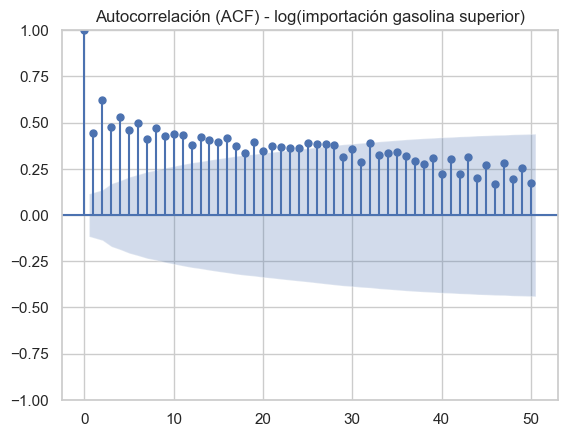

In [23]:

plot_acf(log_serie_sup, lags=50)
plt.title("Autocorrelación (ACF) - log(importación gasolina superior)")
plt.show()


La serie logarítmica no es estacionaria en media, como lo indica:

La alta autocorrelación inicial,

El decaimiento lento de los valores de Acf.

In [24]:

# Prueba ADF
adf_result = adfuller(log_serie_sup)

print("Prueba de Dickey-Fuller Aumentada (ADF)")
print(f"Estadístico ADF: {adf_result[0]}")
print(f"p-valor        : {adf_result[1]}")
print("Valores críticos:")
for key, value in adf_result[4].items():
    print(f"  - {key}: {value}")


Prueba de Dickey-Fuller Aumentada (ADF)
Estadístico ADF: -2.270770144027168
p-valor        : 0.1815685154763218
Valores críticos:
  - 1%: -3.4537536300652
  - 5%: -2.8718443180148836
  - 10%: -2.572260641818822


La hipótesis nula de la prueba ADF es que la serie NO es estacionaria en media.

Como el estadístico ADF es mayor que todos los valores críticos, no se puede rechazar la hipótesis nula.


Conclusión: La prueba confirma que la serie transformada con logaritmo no es estacionaria en media.

Y para hacerla estacionaria deberiamos diff_log = log_serie_sup.diff().dropna()


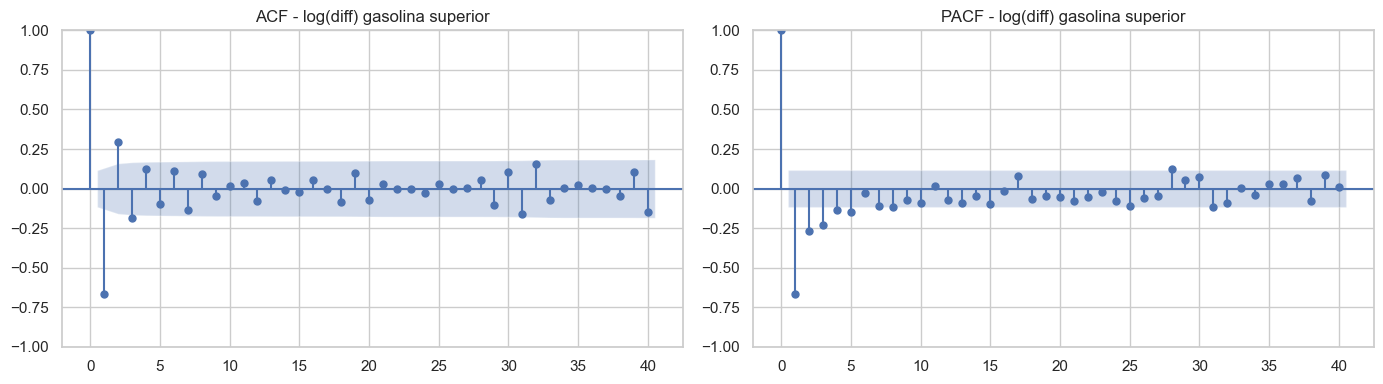

In [25]:

diff_log = log_serie_sup.diff().dropna()

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# ACF
plot_acf(diff_log, ax=axes[0], lags=40)
axes[0].set_title("ACF - log(diff) gasolina superior")

# PACF
plot_pacf(diff_log, ax=axes[1], lags=40, method="ywm")
axes[1].set_title("PACF - log(diff) gasolina superior")

plt.tight_layout()
plt.show()



Modelo ARIMA(1,1,1) es una buena primera elección para esta serie:

p = 1 (por el corte en PACF),

d = 1 (porque diferenciamos una vez),

q = 1 (por el corte en ACF).

In [26]:

warnings.filterwarnings("ignore")

# Lista de modelos a evaluar
modelos = [(1,1,1), (2,1,1), (1,1,2), (2,1,2), (0,1,1), (1,1,0), (0,1,2)]

resultados = []

for orden in modelos:
    modelo = ARIMA(log_serie_sup, order=orden)
    resultado = modelo.fit()
    resultados.append((orden, resultado.aic, resultado.bic))
    print(f"ARIMA{orden} → AIC: {resultado.aic:.2f}, BIC: {resultado.bic:.2f}")


ARIMA(1, 1, 1) → AIC: -8.51, BIC: 2.46
ARIMA(2, 1, 1) → AIC: -16.04, BIC: -1.40
ARIMA(1, 1, 2) → AIC: -13.61, BIC: 1.03
ARIMA(2, 1, 2) → AIC: -14.10, BIC: 4.19
ARIMA(0, 1, 1) → AIC: 1.18, BIC: 8.50
ARIMA(1, 1, 0) → AIC: 43.29, BIC: 50.61
ARIMA(0, 1, 2) → AIC: -4.38, BIC: 6.60


El modelo ARIMA(2,1,1) es el mejor entre los evaluados para estimar la serie log-transformada de importación de gasolina superior, ya que presenta los valores más bajos tanto de AIC como de BIC. Esto indica un equilibrio adecuado entre ajuste y parsimonia.

In [27]:

df_prophet = pd.DataFrame()
df_prophet["ds"] = import_gasolina_superior.index
df_prophet["y"] = np.log(import_gasolina_superior.values) 

df_prophet.head()




,ds,y
0,2001-01-01,12.831915
1,2001-02-01,12.401191
2,2001-03-01,12.651029
3,2001-04-01,12.560437
4,2001-05-01,12.614579


16:54:28 - cmdstanpy - INFO - Chain [1] start processing
16:54:28 - cmdstanpy - INFO - Chain [1] done processing


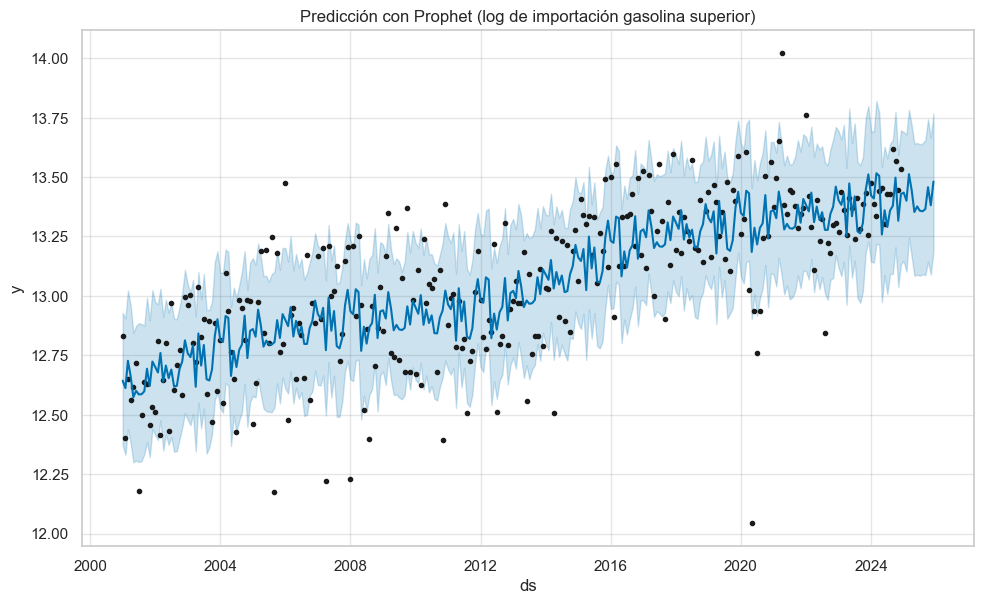

In [28]:
modelo_prophet = Prophet(yearly_seasonality=True)
modelo_prophet.fit(df_prophet)

future = modelo_prophet.make_future_dataframe(periods=12, freq='MS')
forecast = modelo_prophet.predict(future)

modelo_prophet.plot(forecast)
plt.title("Predicción con Prophet (log de importación gasolina superior)")
plt.show()



In [31]:
modelo_arima = ARIMA(np.log(import_gasolina_superior), order=(2,1,1)).fit()
pred_arima = modelo_arima.predict(start=1, end=len(import_gasolina_superior)-1)

pred_prophet = forecast.set_index("ds").loc[import_gasolina_superior.index]["yhat"]

y_real = np.log(import_gasolina_superior)
arima_rmse = np.sqrt(mean_squared_error(y_real[1:], pred_arima))
prophet_rmse = np.sqrt(mean_squared_error(y_real, pred_prophet))

print(f"RMSE ARIMA: {arima_rmse:.4f}")
print(f"RMSE Prophet: {prophet_rmse:.4f}")


RMSE ARIMA: 0.2323
RMSE Prophet: 0.2197


Nuevamente el modelo Prophet obtuvo un menor error cuadrático medio (RMSE) en los datos transformados con logaritmo, lo que indica que funcionó mejor en capturar la dinámica de la serie que el modelo ARIMA (2,1,1) seleccionado.

La diferencia no es extremadamente grande, pero sí lo suficiente como para preferir Prophet, especialmente si consideramos que también:

maneja automáticamente la estacionalidad y los días festivos,

permite mayor flexibilidad ante cambios estructurales en la tendencia.

# Serie 3 - importación de diesel alto azufre

In [46]:
# Asegurar que la columna 'Fecha' esté en formato datetime (por si acaso)
importacion_df["Fecha"] = pd.to_datetime(importacion_df["Fecha"], format="%Y-%m-%d", errors="coerce")

# Filtrar solo hasta el 31 de diciembre de 2017
import_diesel = importacion_df.set_index("Fecha")["Diesel alto azufre"]
import_diesel = import_diesel.loc[:'2017-12-31']

# Imprimir resumen
print("Serie: Importación de diesel (hasta 2017)")
print(f"- Inicio     : {import_diesel.index.min().date()}")
print(f"- Fin        : {import_diesel.index.max().date()}")
print(f"- Total de observaciones: {len(import_diesel)}")


Serie: Importación de diesel (hasta 2017)
- Inicio     : 2001-01-01
- Fin        : 2017-12-01
- Total de observaciones: 204


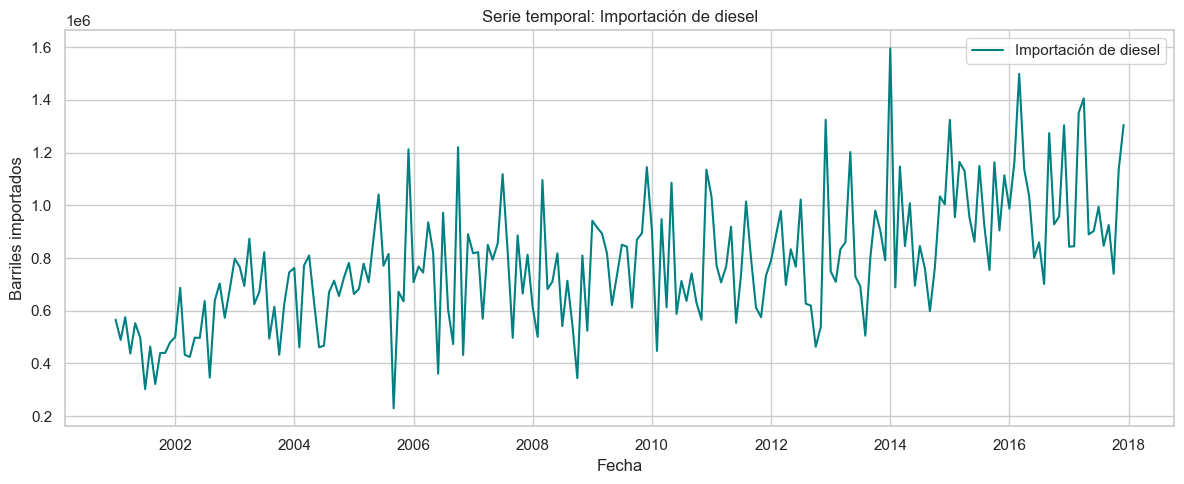

In [47]:

plt.figure(figsize=(12, 5))
plt.plot(import_diesel, label="Importación de diesel", color="teal")
plt.title("Serie temporal: Importación de diesel")
plt.xlabel("Fecha")
plt.ylabel("Barriles importados")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Tendencia general

Entre 2000 y 2018 aproximadamente, se observa una tendencia creciente moderadamente irregular en la importación de diésel. Hay fluctuaciones mes a mes, pero en general el volumen importado aumenta, alcanzando picos por encima de 1.6 millones de barriles.

A partir de finales de 2018/principios de 2019, la serie cae bruscamente a cero porque fue por la Regulación nacional: entrada en vigor del reglamento COGUANOR, Impacto en salud pública y ambiente y basicamente que ahora casi solo se usa bajo en azufre 

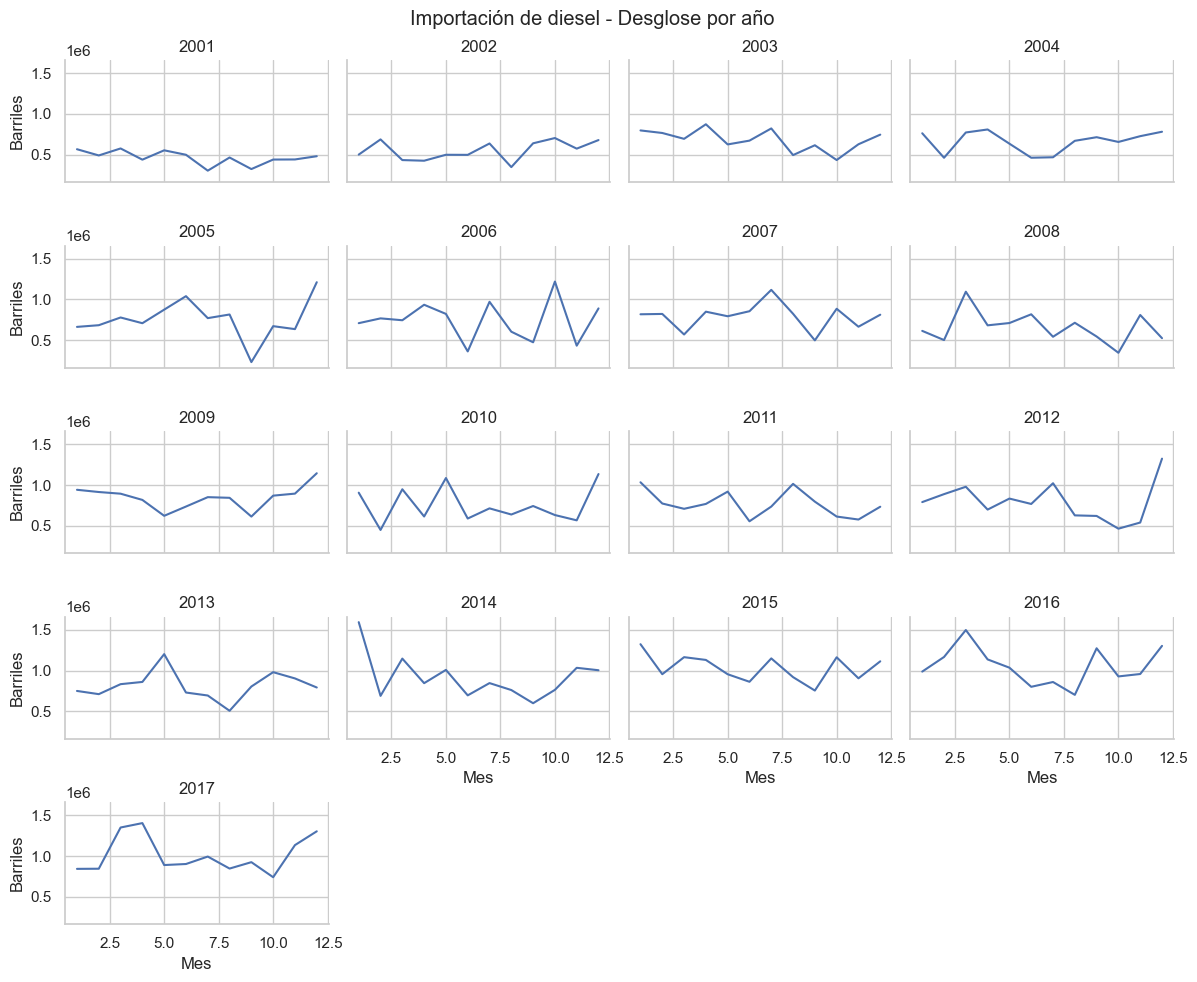

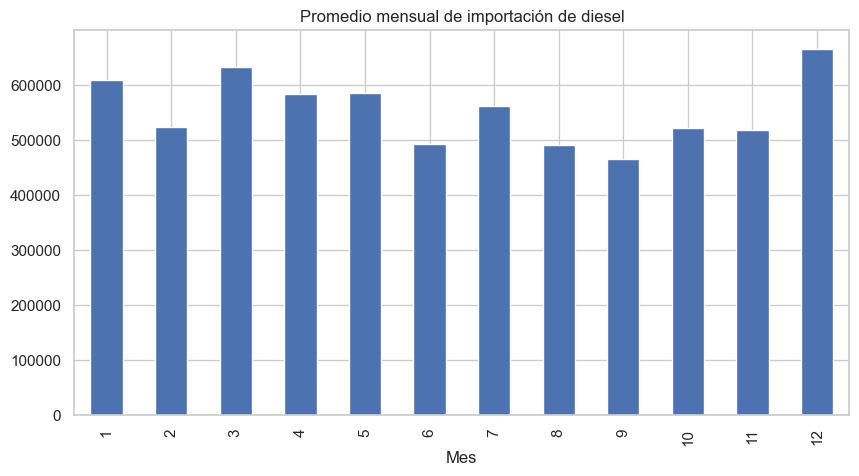

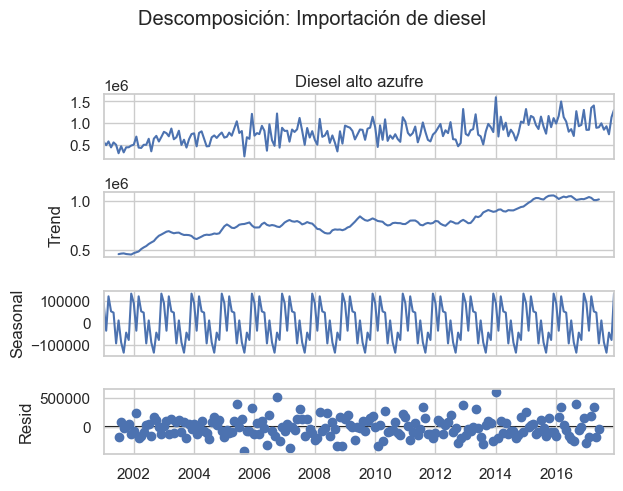

In [48]:
# Crear columna de año y mes
df_yearplot = import_diesel.reset_index()
df_yearplot["Año"] = df_yearplot["Fecha"].dt.year
df_yearplot["Mes"] = df_yearplot["Fecha"].dt.month

# Crear gráfico
g = sns.FacetGrid(df_yearplot, col="Año", col_wrap=4, height=2, aspect=1.5)
g.map_dataframe(sns.lineplot, x="Mes", y="Diesel alto azufre")
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Mes", "Barriles")
g.fig.subplots_adjust(top=0.93)
g.fig.suptitle("Importación de diesel - Desglose por año")
plt.show()


###
importacion_df["Mes"] = importacion_df["Fecha"].dt.month
importacion_df.groupby("Mes")["Diesel alto azufre"].mean().plot(kind="bar", figsize=(10,5), title="Promedio mensual de importación de diesel")

# Descomposicion por año 12 meses
decomposed = seasonal_decompose(import_diesel, model='additive', period=12)
decomposed.plot()
plt.suptitle("Descomposición: Importación de diesel", y=1.02)
plt.tight_layout()
plt.show()


1. Serie original

La serie muestra un crecimiento moderado e inestable hasta aproximadamente 2017–2018, seguido de la caida

2. Tendencia

La tendencia se comporta como una curva suavemente creciente hasta 2017

3. Estacionalidad

Se observa una estacionalidad clara y estable de ciclo anual. El componente estacional muestra picos y valles recurrentes a lo largo de los años.

La amplitud es constante, lo que es deseable para modelado y sugiere que, incluso si hay una tendencia, la estacionalidad se mantiene predecible.

4. Ruido

Los residuos están distribuidos de manera más o menos estable hasta 2017


Sí fue necesario aplicar una transformación logarítmica para estabilizar la varianza antes de modelar.
La serie no es estacionaria en varianza, y el logaritmo ayuda a corregir eso.

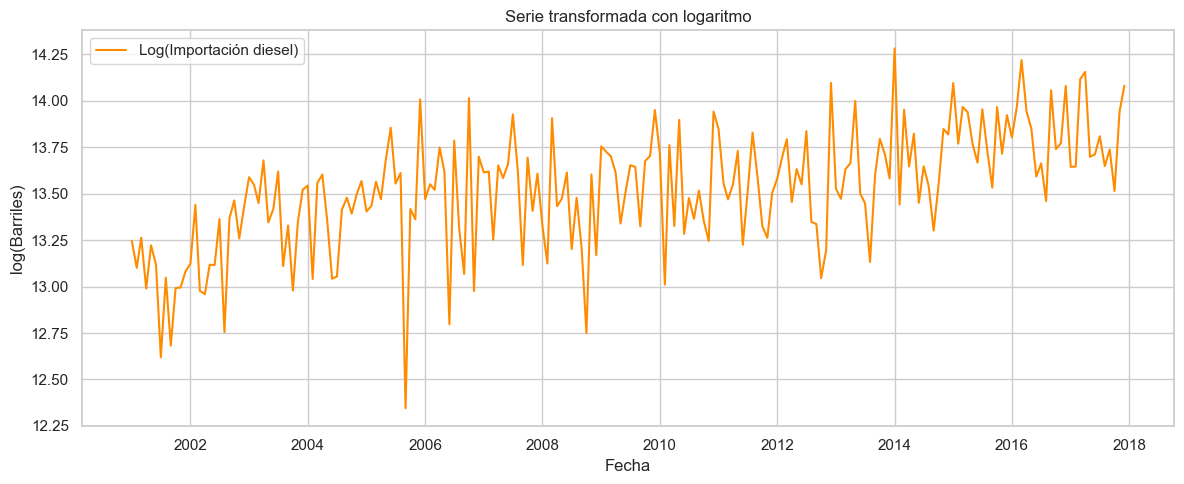

In [49]:
log_serie = np.log(import_diesel)

plt.figure(figsize=(12, 5))
plt.plot(log_serie, label="Log(Importación diesel)", color="darkorange")
plt.title("Serie transformada con logaritmo")
plt.xlabel("Fecha")
plt.ylabel("log(Barriles)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

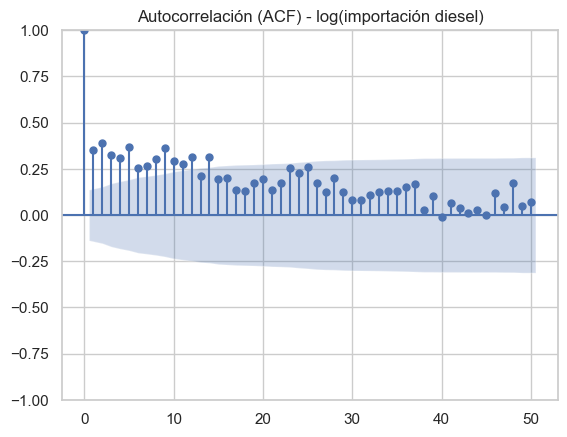

In [52]:
plot_acf(log_serie, lags=50)
plt.title("Autocorrelación (ACF) - log(importación diesel)")
plt.show()

La serie no es estacionaria en media, a pesar de la transformación logarítmica. Esto se evidencia por:

Alta autocorrelación en los primeros rezagos.

Decaimiento lento de la ACF.

Valores significativos más allá del primer lag.

In [51]:

resultado_adf = adfuller(log_serie)
print(f'Estadístico ADF: {resultado_adf[0]}')
print(f'Valor p: {resultado_adf[1]}')
for clave, valor in resultado_adf[4].items():
    print(f'Valor crítico {clave}: {valor}')


Estadístico ADF: -2.336655463558473
Valor p: 0.16041816940936637
Valor crítico 1%: -3.4648754262570978
Valor crítico 5%: -2.876714157488788
Valor crítico 10%: -2.574858699001736


El valor p = 0.160 es mayor que 0.05, por lo tanto, no se rechaza la hipótesis nula de que la serie tiene raíz unitaria → la serie no es estacionaria en media.

El estadístico ADF (−2.337) es mayor que todos los valores críticos (−3.465, −2.877 y −2.575), lo cual confirma la no estacionariedad.

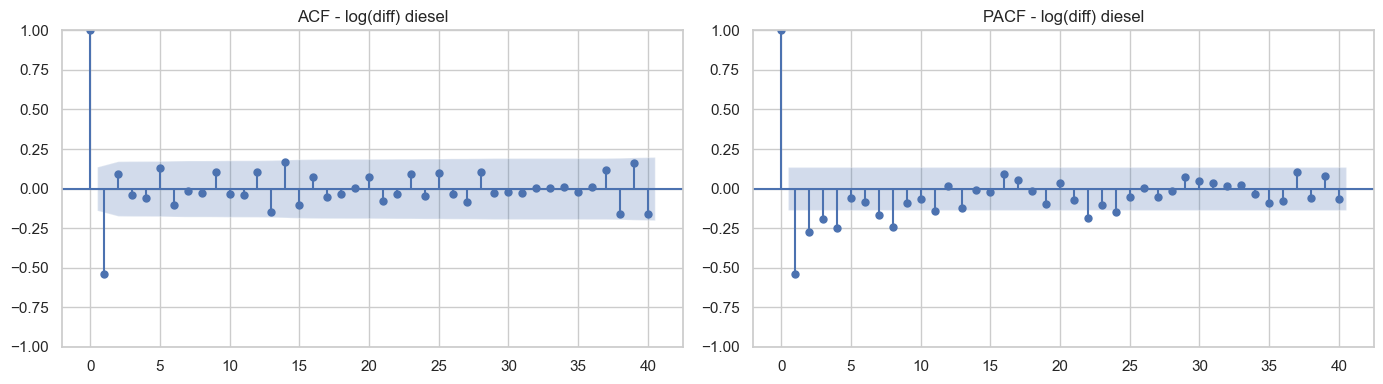

In [53]:
log_diesel_diff = log_serie.diff().dropna()

fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# ACF
plot_acf(log_diesel_diff, ax=axes[0], lags=40)
axes[0].set_title("ACF - log(diff) diesel")

# PACF
plot_pacf(log_diesel_diff, ax=axes[1], lags=40, method="ywm")
axes[1].set_title("PACF - log(diff) diesel")

plt.tight_layout()
plt.show()



In [ ]:


warnings.filterwarnings("ignore")

modelos_arima = [(1,1,1), (2,1,1), (1,1,2), (2,1,2), (0,1,1), (1,1,0), (0,1,2)]

print("Evaluación de modelos ARIMA")
resultados_arima = []
for orden in modelos_arima:
    modelo = ARIMA(log_serie, order=orden)
    resultado = modelo.fit()
    resultados_arima.append((orden, resultado.aic, resultado.bic))
    print(f"ARIMA{orden} → AIC: {resultado.aic:.2f}, BIC: {resultado.bic:.2f}")


Evaluación de modelos ARIMA
ARIMA(1, 1, 1) → AIC: 47.02, BIC: 56.96
ARIMA(2, 1, 1) → AIC: 48.23, BIC: 61.49
ARIMA(1, 1, 2) → AIC: 48.74, BIC: 61.99
ARIMA(2, 1, 2) → AIC: 50.16, BIC: 66.73
ARIMA(0, 1, 1) → AIC: 45.13, BIC: 51.75
ARIMA(1, 1, 0) → AIC: 99.55, BIC: 106.18
ARIMA(0, 1, 2) → AIC: 47.03, BIC: 56.97


en este caso ha sido 011 el mejor 

In [55]:

df_prophet = pd.DataFrame()
df_prophet["ds"] = import_diesel.index
df_prophet["y"] = np.log(import_diesel.values) 

df_prophet.head()

,ds,y
0,2001-01-01,13.246530
1,2001-02-01,13.101192
2,2001-03-01,13.263098
3,2001-04-01,12.989393
4,2001-05-01,13.222406


18:09:31 - cmdstanpy - INFO - Chain [1] start processing
18:09:31 - cmdstanpy - INFO - Chain [1] done processing


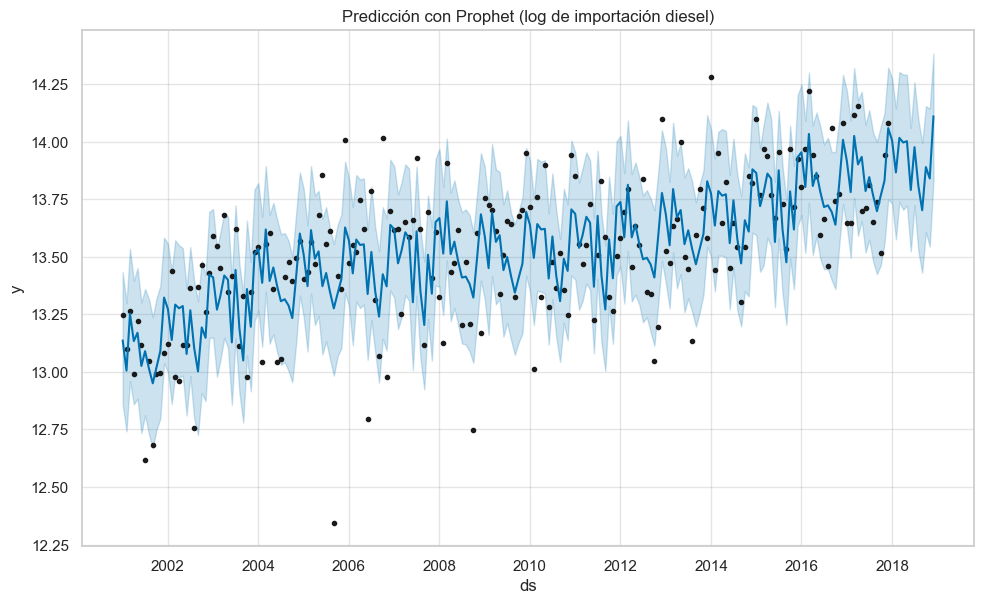

In [56]:
modelo_prophet = Prophet(yearly_seasonality=True)
modelo_prophet.fit(df_prophet)

future = modelo_prophet.make_future_dataframe(periods=12, freq='MS')
forecast = modelo_prophet.predict(future)

modelo_prophet.plot(forecast)
plt.title("Predicción con Prophet (log de importación diesel)")
plt.show()

In [57]:

modelo_arima = ARIMA(np.log(import_diesel), order=(1,1,1)).fit()
pred_arima = modelo_arima.predict(start=1, end=len(import_diesel)-1)

pred_prophet = forecast.set_index("ds").loc[import_diesel.index]["yhat"]

y_real = np.log(import_diesel)
arima_rmse = np.sqrt(mean_squared_error(y_real[1:], pred_arima))
prophet_rmse = np.sqrt(mean_squared_error(y_real, pred_prophet))

print(f"RMSE ARIMA: {arima_rmse:.4f}")
print(f"RMSE Prophet: {prophet_rmse:.4f}")


RMSE ARIMA: 0.2671
RMSE Prophet: 0.2203


Por tervera vez prophet ha sido mejor y es que cuando evaluamos que prophet tmb tiene en cuenta las festividades(cambios de tendencias), tiene sentido porque estas son las que mas tienden a hacer los picos que causan el error en arima. 